In [1]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

from scipy.spatial import distance
from scipy.cluster import hierarchy

import sys, os, itertools
sys.path.append(os.path.abspath("../src/renge"))
from renge import Renge

import seaborn as sns
sns.set_context('talk')
sns.set_style('white')
sns.set_style('ticks')
%matplotlib inline

/home/masa12/.pyenv/versions/anaconda3-2.5.0/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Load data

In [2]:
X = pd.read_csv('./data/X_renge_d2_80.csv', index_col=0)
E = pd.read_csv('./data/E_renge_d2_80.csv', index_col=0)

X = X.reindex(sorted(X.columns), axis=1)
E = E.reindex(sorted(E.columns), axis=1)

## Perform GRN inference

In [3]:
reg = Renge()

# This calculation may take several tens of minutes depending on the computing environment.
A = reg.estimate_hyperparams_and_fit(X, E, n_trials=30)

/home/masa12/.pyenv/versions/anaconda3-2.5.0/lib/python3.6/site-packages/optuna/samplers/_tpe/sampler.py:191: ExperimentalWarning: ``multivariate`` option is an experimental feature. The interface can change in the future.
  ExperimentalWarning,
[I 2023-11-12 02:48:17,835] A new study created in memory with name: no-name-1b302550-bcdd-45cc-b02a-6cfa7fb926c4
[I 2023-11-12 02:48:57,227] Trial 0 finished with value: 0.0029960393905639647 and parameters: {'C': 0.1731545213601452, 'A_l1_ratio': 8.716751139819287e-06, 'n_k': 4}. Best is trial 0 with value: 0.0029960393905639647.
[I 2023-11-12 02:49:22,587] Trial 1 finished with value: -0.011315298080444337 and parameters: {'C': 5.262773511577306e-09, 'A_l1_ratio': 2.9918330622942383e-08, 'n_k': 1}. Best is trial 0 with value: 0.0029960393905639647.
[I 2023-11-12 02:49:47,242] Trial 2 finished with value: 0.0024221181869506837 and parameters: {'C': 0.08218105343373862, 'A_l1_ratio': 2.0194552111654566e-06, 'n_k': 2}. Best is trial 0 with valu

In [4]:
A_qval = reg.calc_qval(n_boot=30)

100%|█████████████████████████████████████████████| 30/30 [24:56<00:00, 49.87s/it]


## Visualize the GRN

In [7]:
A_norm = A_filt / np.abs(A_filt).max(axis=0)
A_norm = A_norm.fillna(0)

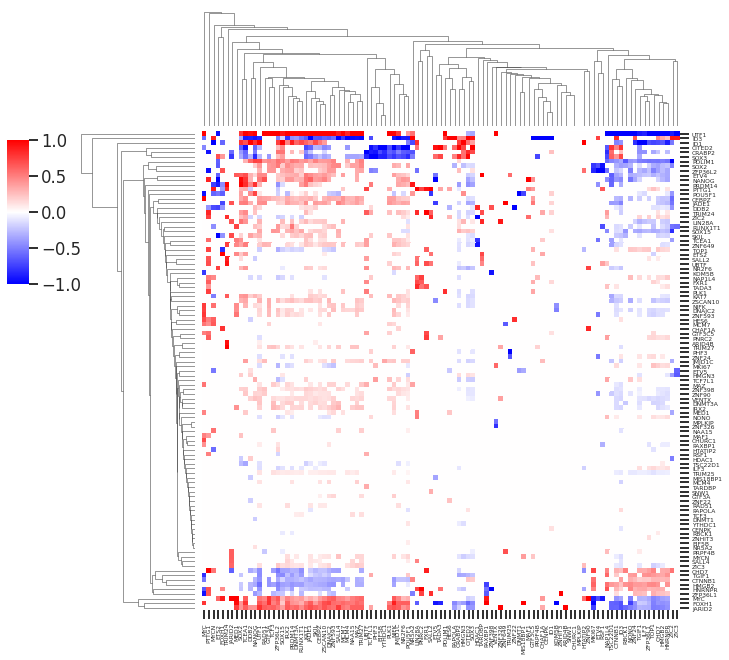

In [8]:
row_linkage = hierarchy.linkage(
    distance.pdist(A_norm), method='average')

col_linkage = hierarchy.linkage(
    distance.pdist(A_norm.T), method='average')

g = sns.clustermap(A_norm, row_linkage=row_linkage, col_linkage=col_linkage,
                   method="average", cmap='bwr', center=0,
                   xticklabels=True, yticklabels=True)
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(), fontsize = 6)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels(), fontsize = 6)
g.ax_cbar.set_position([-0.08, 0.6, 0.03, 0.2])